In [89]:
import pandas as pd 
import numpy as np 
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.optimizer_v2 import adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras import layers


In [90]:
path = 'mydata'
myList = os.listdir(path)
noOfClasses = len(myList)

In [91]:
images = []
classNo = []
for i in range(0,noOfClasses):
    myPiclist = os.listdir(path+"/"+str(i))

    for img in myPiclist:
        currImg = cv2.imread(path+"/"+str(i)+"/"+img)
        currImg = cv2.resize(currImg,(32,32))
        images.append(currImg)
        classNo.append(i)


In [92]:
images = np.array(images)
classNo = np.array(classNo)

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2,random_state=43)

In [94]:
X_train,X_validtion,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=43)

In [95]:
def Preprocessing(imgage):
    imgage = cv2.cvtColor(imgage,cv2.COLOR_BGR2GRAY)
    imgage = cv2.equalizeHist(imgage)
    imgage = imgage / 255
    return imgage

In [96]:
X_train = np.array(list(map(Preprocessing,X_train)))

In [97]:
X_test = np.array(list(map(Preprocessing,X_test)))

In [98]:
X_validtion = np.array(list(map(Preprocessing,X_validtion)))

In [99]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_train.shape

(6502, 32, 32, 1)

In [100]:
X_train[0].shape

(32, 32, 1)

In [101]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validtion = X_validtion.reshape(X_validtion.shape[0],X_validtion.shape[1],X_validtion.shape[2],1)

In [102]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
dataGen.fit(X_train)

In [103]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

In [104]:
X_train.shape

(6502, 32, 32, 1)

In [106]:
def myModel():
    noOfFilters = 60
    size_filter1 = (5,5)
    size_filter2 = (3,3)
    sizePool = (2,2)
    noOfNodes = 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,size_filter1,activation='relu',input_shape=(32,32,1))))
    model.add((Conv2D(noOfFilters,size_filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizePool))
    model.add((Conv2D(noOfFilters//2,size_filter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,size_filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizePool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model = myModel()


In [107]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 60)        32460     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 30)        16230     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 30)          8130      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 30)         

In [108]:
history = model.fit(dataGen.flow(X_train,y_train,batch_size=50),
                    epochs=10,
                    validation_data =(X_validtion,y_validation), 
                    shuffle=1
                    )
# history = model.fit(X_train,y_train,
#                     epochs=10,
#                     validation_data =(X_validtion,y_validation), 
#                     shuffle=1
#                     )

Epoch 1/10
131/131 [==============================] - 5s 27ms/step - loss: 1.2868 - accuracy: 0.5546 - val_loss: 0.1883 - val_accuracy: 0.9625
Epoch 2/10
131/131 [==============================] - 4s 31ms/step - loss: 0.4504 - accuracy: 0.8567 - val_loss: 0.0798 - val_accuracy: 0.9797
Epoch 3/10
131/131 [==============================] - 6s 48ms/step - loss: 0.3365 - accuracy: 0.8937 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 4/10
131/131 [==============================] - 7s 56ms/step - loss: 0.2466 - accuracy: 0.9209 - val_loss: 0.0341 - val_accuracy: 0.9938
Epoch 5/10
131/131 [==============================] - 7s 54ms/step - loss: 0.1921 - accuracy: 0.9403 - val_loss: 0.0350 - val_accuracy: 0.9914
Epoch 6/10
131/131 [==============================] - 8s 59ms/step - loss: 0.1779 - accuracy: 0.9451 - val_loss: 0.0328 - val_accuracy: 0.9895
Epoch 7/10
131/131 [==============================] - 7s 56ms/step - loss: 0.1525 - accuracy: 0.9540 - val_loss: 0.0180 - val_accuracy: 0.9951

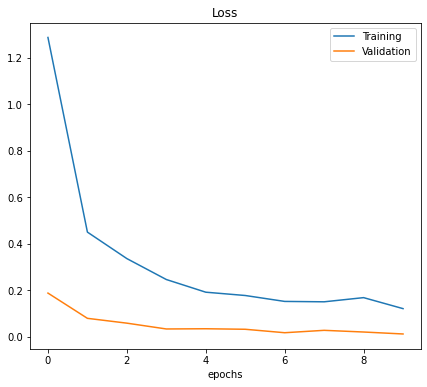

In [109]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,6))
plt.plot(history.history['loss']);
plt.plot(history.history["val_loss"]);
plt.legend(["Training","Validation"]);
plt.xlabel("epochs")
plt.title("Loss");

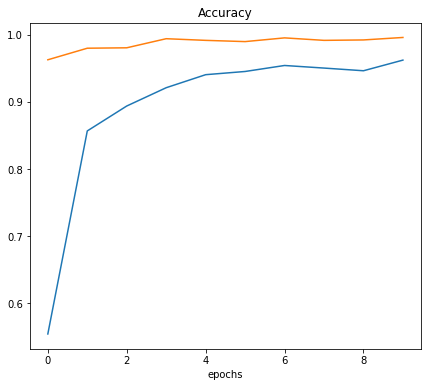

In [110]:
plt.figure(figsize=(7,6))
plt.plot(history.history['accuracy']);
plt.plot(history.history["val_accuracy"]);
plt.xlabel("epochs")
plt.title("Accuracy");

In [111]:
# import pickle
# pickle_out = open("model_train.p",'wb')
# pickle.dump(model,pickle_out)
# pickle_out.close()

In [112]:
model.save("myModel")

INFO:tensorflow:Assets written to: myModel\assets


In [113]:
from tensorflow import keras
m = keras.models.load_model("myModel")

In [114]:
img = cv2.imread('3.jfif')
i = cv2.resize(img,(32,32))
i = np.array(i)

i = Preprocessing(i)

In [115]:
i =i.reshape(1,32,32,1)

In [116]:
p = m.predict(i)

In [117]:
for i in p[0]:
    if i >0.8:
        print(i)

0.9999974


In [122]:
np.argmax(p)

3

In [123]:
np.amax(p)

0.9999974